 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_data = Path("./Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_data, index_col="Date")
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_df.isna().sum().sum()

4

In [5]:
# Drop nulls
whale_df.dropna(inplace=True)

In [6]:
whale_df.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_data = Path("./Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_data, index_col="Date")
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls
algo_df.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
sp500_data = Path("./Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_data, index_col="Date")
sp500_df.head()

,Close
Date,
23-Apr-19,$2933.68
22-Apr-19,$2907.97
18-Apr-19,$2905.03
17-Apr-19,$2900.45
16-Apr-19,$2907.06


In [11]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$','')
sp500_df.head()

<ipython-input-12-e5d6d9a3ca9a>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_df['Close'] = sp500_df['Close'].str.replace('$','')


,Close
Date,
23-Apr-19,2933.68
22-Apr-19,2907.97
18-Apr-19,2905.03
17-Apr-19,2900.45
16-Apr-19,2907.06


In [13]:
sp500_df['Close'] = sp500_df['Close'].astype('float')

In [14]:
sp500_df.dtypes

Close    float64
dtype: object

In [15]:
sp500_df.columns[0]

'Close'

In [16]:
# Calculate Daily Returns
daily_returns_sp500 = sp500_df.pct_change()
daily_returns_sp500.head()

,Close
Date,
23-Apr-19,NaN
22-Apr-19,-0.008764
18-Apr-19,-0.001011
17-Apr-19,-0.001577
16-Apr-19,0.002279


In [17]:
# Drop nulls
daily_returns_sp500.isna().sum()
daily_returns_sp500.dropna(inplace=True)

In [18]:
daily_returns_sp500.isna().sum()

Close    0
dtype: int64

In [19]:
daily_returns_sp500.head()

,Close
Date,
22-Apr-19,-0.008764
18-Apr-19,-0.001011
17-Apr-19,-0.001577
16-Apr-19,0.002279
15-Apr-19,-0.000509


In [20]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns_sp500 = daily_returns_sp500.rename(columns={'Close': 'Close_sp500'})

In [21]:
daily_returns_sp500.head()

,Close_sp500
Date,
22-Apr-19,-0.008764
18-Apr-19,-0.001011
17-Apr-19,-0.001577
16-Apr-19,0.002279
15-Apr-19,-0.000509


In [22]:
daily_returns_sp500.reset_index(inplace=True)

In [23]:
daily_returns_sp500.head()

,Date,Close_sp500
0,22-Apr-19,-0.008764
1,18-Apr-19,-0.001011
2,17-Apr-19,-0.001577
3,16-Apr-19,0.002279
4,15-Apr-19,-0.000509


In [24]:
daily_returns_sp500['Date'] = pd.to_datetime(daily_returns_sp500['Date']).dt.strftime("%Y-%m-%d")

In [25]:
daily_returns_sp500.set_index('Date', inplace=True)

In [69]:
daily_returns_sp500.sort_values(by='Date')

,Close_sp500
Date,
2012-10-01,-0.000872
2012-10-02,-0.003611
2012-10-03,-0.007123
2012-10-04,0.000322
2012-10-05,0.003469
...,...
2019-04-15,-0.000509
2019-04-16,0.002279
2019-04-17,-0.001577


In [70]:
daily_returns_sp500.head()

,Close_sp500
Date,
2012-10-01,-0.000872
2012-10-02,-0.003611
2012-10-03,-0.007123
2012-10-04,0.000322
2012-10-05,0.003469


In [71]:
daily_returns_sp500.sort_index(inplace=True)
daily_returns_sp500.head()
##sort_index function

,Close_sp500
Date,
2012-10-01,-0.000872
2012-10-02,-0.003611
2012-10-03,-0.007123
2012-10-04,0.000322
2012-10-05,0.003469


## Combine Whale, Algorithmic, and S&P 500 Returns

In [28]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_df, algo_df, daily_returns_sp500], axis="columns", join="inner")


In [29]:
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close_sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [30]:
##daily_returns = dataframe.pct_change()

daily_returns_whales = whale_df.pct_change()
daily_returns_algo = algo_df.pct_change()

daily_returns_whales.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381
2015-03-05,0.800968,0.257544,-1.929234,0.596558
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840


In [31]:
daily_returns_algo.head()

,Algo 1,Algo 2
Date,,
2014-06-05,NaN,NaN
2014-06-06,-0.542965,-0.376459
2014-06-09,-3.699288,-0.315757
2014-06-10,-1.879164,-1.129760
2014-06-11,0.080354,4.113963


In [32]:
daily_returns_whales.dropna(inplace=True)
daily_returns_algo.dropna(inplace=True)

<AxesSubplot:xlabel='Date'>

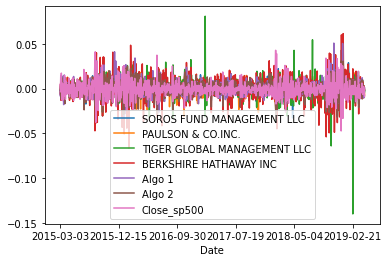

In [33]:
combined_returns.plot()

In [34]:
daily_returns = combined_returns.pct_change()
daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close_sp500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-1.271027
2015-03-05,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231,-13.035127
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,4.190043,-3.650914,-1.273267
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,0.098917,-1.113716,-5.391499


In [35]:
daily_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close_sp500
Date,,,,,,,
2019-04-15,-1.251107,-0.007347,-0.905642,-2.434236,-0.212628,-2.014920,-1.808331
2019-04-16,-2.898341,-1.335693,-3.088322,-1.079744,0.603391,-1.634218,-5.476395
2019-04-17,-2.073108,-17.661104,4.306537,2.851033,0.483294,-2.803170,-1.691797
2019-04-18,-1.499843,-1.188925,-1.131886,-0.405345,-0.942926,-0.764890,-0.358728
2019-04-22,-2.785826,-7.001458,-7.259521,-1.567709,-2.150780,0.574781,7.668260


In [36]:
daily_returns.dropna(inplace=True)
daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close_sp500
Date,,,,,,,
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-1.271027
2015-03-05,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231,-13.035127
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,4.190043,-3.650914,-1.273267
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,0.098917,-1.113716,-5.391499
2015-03-10,-18.625495,-2.263954,-3.067380,4.893672,-0.744524,-10.327163,-0.888644


<AxesSubplot:xlabel='Date'>

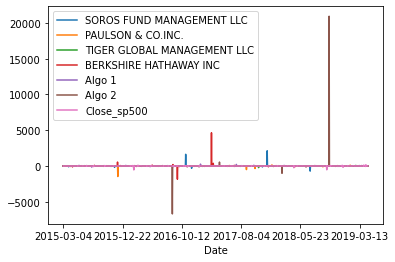

In [37]:
# Plot daily returns of all portfolios
daily_returns.plot()

#### Calculate and Plot cumulative returns.

---

In [38]:
# Calculate cumulative returns of all portfolios
##cumulative_returns = (1 + daily_returns).cumprod() - 1

cum_returns_whales = (1 + daily_returns_whales).cumprod() - 1
cum_returns_algo = (1 + daily_returns_algo).cumprod() - 1
cum_returns_sp500 = (1 + daily_returns_sp500).cumprod() - 1




<AxesSubplot:title={'center':'Cumulative Whale Portfolio Returns'}, xlabel='Date'>

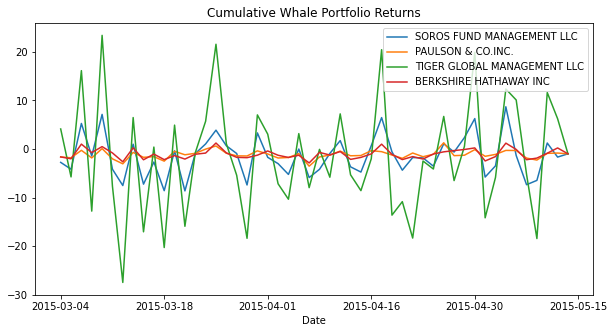

In [39]:
# Plot cumulative returns
##cumulative_returns.plot(figsize=(10,5), title="Cumulative Returns of XX")

cum_returns_whales.plot(figsize=(10,5), title="Cumulative Whale Portfolio Returns")

<AxesSubplot:title={'center':'Cumulative Algo Returns'}, xlabel='Date'>

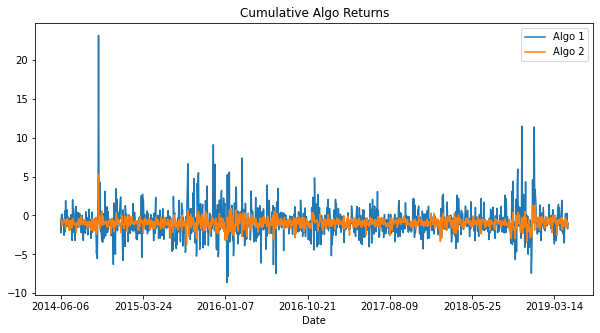

In [40]:
cum_returns_algo.plot(figsize=(10,5), title="Cumulative Algo Returns")

<AxesSubplot:title={'center':'Cumulative S&P 500 Returns'}, xlabel='Date'>

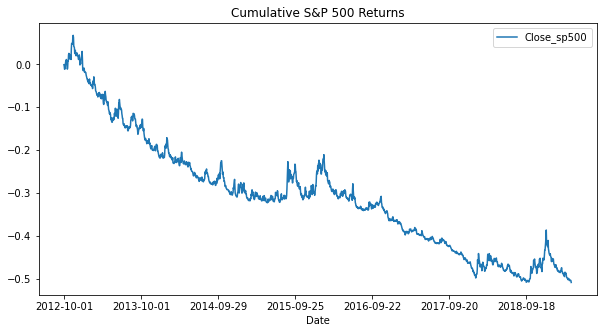

In [72]:
cum_returns_sp500.plot(figsize=(10,5), title="Cumulative S&P 500 Returns")

In [ ]:
###I know that the S&P500 Data is incorrectly inverted, but I have not been able to fix it

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

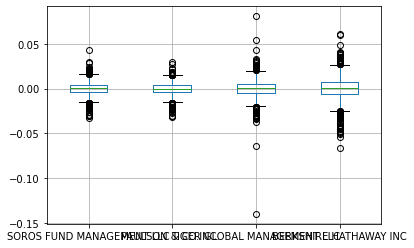

In [42]:
# Box plot to visually show risk
whale_df.boxplot()

<AxesSubplot:>

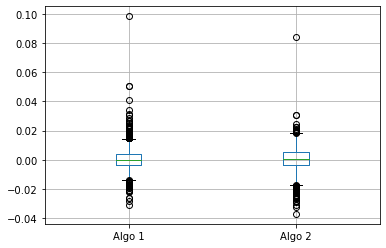

In [43]:
algo_df.boxplot()

### Calculate Standard Deviations

In [73]:
# Calculate the daily standard deviations of all portfolios
whale_std = whale_df.std()*np.sqrt(252)
algo_std = algo_df.std()*np.sqrt(252)


In [74]:
whale_std

SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64

In [75]:
algo_std

Algo 1    0.126801
Algo 2    0.134401
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [80]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = sp500_df.std()*np.sqrt(252)

sp500_std
# Determine which portfolios are riskier than the S&P 500


Close    6383.488916
dtype: float64

### Calculate the Annualized Standard Deviation

In [46]:
# Calculate the annualized standard deviation (252 trading days)


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [47]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation


### Calculate and plot the correlation

In [48]:
# Calculate the correlation

# Display de correlation matrix


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [49]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P 500

# Computing beta

# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [50]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [51]:
# Annualized Sharpe Ratios


In [52]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [53]:
# Reading data from 1st stock


In [54]:
# Reading data from 2nd stock


In [55]:
# Reading data from 3rd stock


In [56]:
# Combine all stocks in a single DataFrame


In [57]:
# Reset Date index


In [58]:
# Reorganize portfolio data by having a column per symbol


In [59]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [60]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [61]:
# Join your returns DataFrame to the original returns DataFrame


In [62]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [63]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [64]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [65]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [66]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [67]:
# Calculate Annualzied Sharpe Ratios


In [68]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!